AWS

In [44]:
import matplotlib.pyplot as plt
import numpy as np
from datetime import datetime

In [45]:
montage_20_t32xlarge_start = '20:06:05'
montage_20_t32xlarge_stop = '20:22:35'
montage_20_t3large_start = '18:46:52'
montage_20_t3large_stop = '19:02:29'

soykb_446_t32xlarge_start = '03:22:07'
soykb_446_t32xlarge_stop = '12:49:16'
soykb_446_t3large_start = '20:52:44'
soykb_446_t3large_stop = '08:22:27'

montage2_10_t32xlarge_start = '20:53:17'
montage2_10_t32xlarge_stop = '21:47:05'
montage2_10_t3large_start = '08:08:51'
montage2_10_t3large_stop = '09:35:05'

In [46]:
def calculate_duration(time_from, time_to):
    fmt = '%H:%M:%S'
    diff = datetime.strptime(time_from, fmt) - datetime.strptime(time_to, fmt)
    h,m,s = str(diff).split(':')
    h = abs(24-int(h.split(',')[1])) if h[0] == '-' else h
    res = int(h)*60 + int(m) + int(s)/60
    return res if res > 0 else res + 24 * 60 

In [47]:
aws_data = {'t3.large': [calculate_duration(montage_20_t3large_stop, montage_20_t3large_start),
                        calculate_duration(montage2_10_t3large_stop, montage2_10_t3large_start),
                        calculate_duration(soykb_446_t3large_stop, soykb_446_t3large_start)],
           't3.2xlarge': [calculate_duration(montage_20_t32xlarge_stop, montage_20_t32xlarge_start),
                        calculate_duration(montage2_10_t32xlarge_stop, montage2_10_t32xlarge_start),
                        calculate_duration(soykb_446_t32xlarge_stop, soykb_446_t32xlarge_start)]}

In [58]:
def draw_comparison_bar_plot(data, labels, bar_width):
    fig, ax = plt.subplots(figsize=(18, 8))
    x = np.arange(len(labels))
    for i, (instance, times) in enumerate(data.items()):
        width = bar_width/len(times)
        ax.bar(x - 0.4 + width/2 + width*i, times, width, label=instance)

    ax.set_xticks(x)
    ax.set_xticklabels(labels)
    ax.set_ylabel('Time [minutes]')
    ax.set_title('Time of workflows execution by instance type')
    plt.xticks(rotation=90)
    
    ax.legend()
    plt.show()

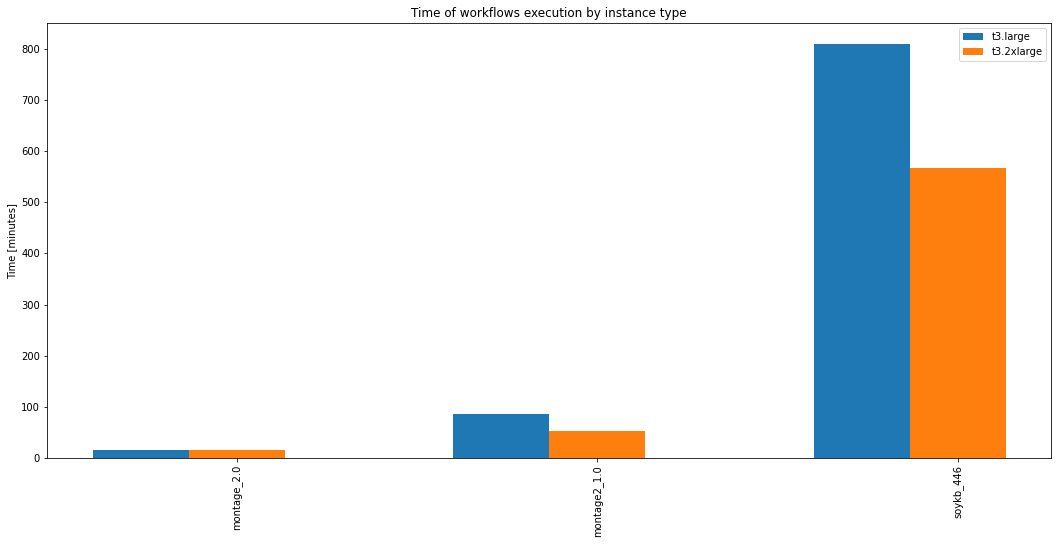

In [59]:
draw_comparison_bar_plot(aws_data, ['montage_2.0','montage2_1.0','soykb_446'], 0.8)

GCLOUD

In [60]:
montage_20_c2standard_start = '08:13:04'
montage_20_c2standard_stop = '08:22:43'
montage_20_e2standard_start = '17:58:46'
montage_20_e2standard_stop = '18:07:51'
montage_20_n1standard_start = '17:42:32'
montage_20_n1standard_stop = '17:56:59'
montage_20_n2dstandard_start = '16:50:51'
montage_20_n2dstandard_stop = '17:04:12'
montage_20_n2standard_start = '17:45:14'
montage_20_n2standard_stop = '17:59:15'

soykb_446_c2standard_start = '23:15:45'
soykb_446_c2standard_stop = '07:50:25'
soykb_446_e2standard_start = '11:38:54'
soykb_446_e2standard_stop = '23:24:36'
# przerwane
# soykb_446_n1standard_start = '22:51:42'
# soykb_446_n1standard_stop = '02:45:32'
soykb_446_n2dstandard_start = '11:22:14'
soykb_446_n2dstandard_stop = '18:41:50'
soykb_446_n2standard_start = '22:51:35'
soykb_446_n2standard_stop = '08:02:28'

montage2_10_c2standard_start = '08:44:54'
montage2_10_c2standard_stop = '09:21:52'
montage2_10_e2standard_start = '18:34:01'
montage2_10_e2standard_stop = '19:12:35'
montage2_10_n1standard_start = '18:29:09'
montage2_10_n1standard_stop = '19:33:59'
montage2_10_n2dstandard_start = '20:22:27'
montage2_10_n2dstandard_stop = '21:43:22'
montage2_10_n2standard_start = '18:29:13'
montage2_10_n2standard_stop = '19:27:29'

In [61]:
gcloud_data = {'c2-standard': [calculate_duration(montage_20_c2standard_stop, montage_20_c2standard_start),
                        calculate_duration(montage2_10_c2standard_stop, montage2_10_c2standard_start),
                        calculate_duration(soykb_446_c2standard_stop, soykb_446_c2standard_start)],
               'e2-standard': [calculate_duration(montage_20_e2standard_stop, montage_20_e2standard_start),
                        calculate_duration(montage2_10_e2standard_stop, montage2_10_e2standard_start),
                        calculate_duration(soykb_446_e2standard_stop, soykb_446_e2standard_start)],
               'n1-standard': [calculate_duration(montage_20_n1standard_stop, montage_20_n1standard_start),
                        calculate_duration(montage2_10_n1standard_stop, montage2_10_n1standard_start),
                        0],
               'n2d-standard': [calculate_duration(montage_20_n2dstandard_stop, montage_20_n2dstandard_start),
                        calculate_duration(montage2_10_n2dstandard_stop, montage2_10_n2dstandard_start),
                        calculate_duration(soykb_446_n2dstandard_stop, soykb_446_n2dstandard_start)],
               'n2-standard': [calculate_duration(montage_20_n2standard_stop, montage_20_n2standard_start),
                        calculate_duration(montage2_10_n2standard_stop, montage2_10_n2standard_start),
                        calculate_duration(soykb_446_n2standard_stop, soykb_446_n2standard_start)]}

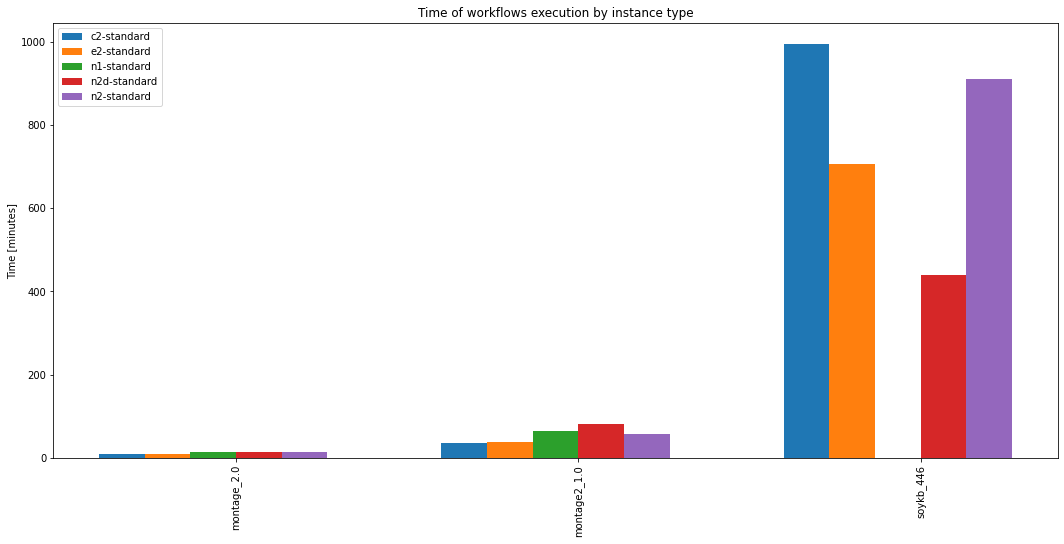

In [62]:
draw_comparison_bar_plot(gcloud_data, ['montage_2.0','montage2_1.0','soykb_446'], 0.4)